In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(255/256, 1, N)    ## red  255,192, 203
vals[:, 1] = np.linspace(192/256, 1, N)
vals[:, 2] = np.linspace(203/256, 1, N)  ## blue 75, 0, 130
Pinks = ListedColormap(vals)


top = cm.get_cmap(Pinks, 256)
bottom = cm.get_cmap('Purples', 256)

newcolors = np.vstack((top(np.linspace(0, 1, 256)),
                       bottom(np.linspace(0, 1, 256))))

newcmp = ListedColormap(newcolors, name='PinkPueple')

In [2]:
guests_characteristics = pd.read_csv('data/Predykcyjne_guest_characteristics_.csv')
guests_cusine =  pd.read_csv('data/Predykcyjne_guest_cuisine_.csv')
guests_payment =  pd.read_csv('data/Predykcyjne_guest_payment_.csv')

guests_characteristics.drop( 'Unnamed: 0', axis = 1, inplace = True)
guests_cusine.drop( 'Unnamed: 0', axis = 1, inplace = True)
guests_payment.drop( 'Unnamed: 0', axis = 1, inplace = True)

restaurant_cusine =pd.read_csv('data/Predykcyjne_restaurant_cuisine.csv')
restaurant_open =pd.read_csv('data/Predykcyjne_restaurant_open.csv')
restaurant_parking =pd.read_csv('data/Predykcyjne_restaurant_parking.csv')
restaurant_payment =pd.read_csv('data/Predykcyjne_restaurant_payment.csv')

stars = pd.read_csv("data/Predykcyjne_Stars_.csv")

## Guest Table

In [3]:
df_inner = pd.merge(guests_characteristics, guests_cusine, on='guestID', how='inner')
guests = pd.merge(df_inner, guests_payment, on='guestID', how='inner')
guests

,guestID,smoking,drinker,dress_preference,company,transport,marital_status,birth_year,interest,religion,activity,color,weight,budget,height,cuisine,payment
0,U1001,false,abstemious,informal,family,on foot,single,1989,variety,none,student,black,69,medium,1.77,American,cash
1,U1002,false,abstemious,informal,family,public,single,1990,technology,Catholic,student,red,40,low,1.87,Mexican,cash
2,U1003,false,social drinker,formal,family,public,single,1989,none,Catholic,student,blue,60,low,1.69,Mexican,cash
3,U1004,false,abstemious,informal,family,public,single,1940,variety,none,professional,green,44,medium,1.53,Bakery,cash
4,U1004,false,abstemious,informal,family,public,single,1940,variety,none,professional,green,44,medium,1.53,Bakery,bank_debit_cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,U1127,false,abstemious,no preference,solitary,public,single,1992,variety,Catholic,student,black,65,low,1.76,Mexican,cash
295,U1128,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Cafeteria,cash
296,U1128,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Hot_Dogs,cash
297,U1128,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Pizzeria,cash


In [4]:
my_info = [guests['smoking'].value_counts(),
            guests['drinker'].value_counts(),
            guests['dress_preference'].value_counts(),
            guests['company'].value_counts(),
            guests['transport'].value_counts(),
            guests['marital_status'].value_counts(),
            guests['interest'].value_counts(),
            guests['religion'].value_counts(),
            guests['activity'].value_counts(),
            guests['color'].value_counts(),
            guests['budget'].value_counts(),
            guests['cuisine'].value_counts(),
            guests['payment'].value_counts()]

#for info in my_info:
#    print(info, "\n\n")

In [5]:
guests.drop(guests.index[guests['dress_preference'] == '?'], inplace = True)
guests.drop(guests.index[guests['company'] == '?'], inplace = True)
guests.drop(guests.index[guests['transport'] == '?'], inplace = True)
guests.drop(guests.index[guests['marital_status'] == '?'], inplace = True)
guests.drop(guests.index[guests['activity'] == '?'], inplace = True)
guests.drop(guests.index[guests['budget'] == '?'], inplace = True)
guests

,guestID,smoking,drinker,dress_preference,company,transport,marital_status,birth_year,interest,religion,activity,color,weight,budget,height,cuisine,payment
0,U1001,false,abstemious,informal,family,on foot,single,1989,variety,none,student,black,69,medium,1.77,American,cash
1,U1002,false,abstemious,informal,family,public,single,1990,technology,Catholic,student,red,40,low,1.87,Mexican,cash
2,U1003,false,social drinker,formal,family,public,single,1989,none,Catholic,student,blue,60,low,1.69,Mexican,cash
3,U1004,false,abstemious,informal,family,public,single,1940,variety,none,professional,green,44,medium,1.53,Bakery,cash
4,U1004,false,abstemious,informal,family,public,single,1940,variety,none,professional,green,44,medium,1.53,Bakery,bank_debit_cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,U1127,false,abstemious,no preference,solitary,public,single,1992,variety,Catholic,student,black,65,low,1.76,Mexican,cash
295,U1128,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Cafeteria,cash
296,U1128,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Hot_Dogs,cash
297,U1128,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Pizzeria,cash


## Merge stars with guests

In [6]:
stars_guests = pd.merge(guests, stars, on='guestID', how='inner')
stars_guests.drop( 'Unnamed: 0', axis = 1, inplace = True)
stars_guests.drop( 'guestID', axis = 1, inplace = True)

stars_guests.drop_duplicates(inplace = True)
stars_guests

,smoking,drinker,dress_preference,company,transport,marital_status,birth_year,interest,religion,activity,color,weight,budget,height,cuisine,payment,restaurantID,stars
0,false,abstemious,informal,family,on foot,single,1989,variety,none,student,black,69,medium,1.77,American,cash,132830,1
1,false,abstemious,informal,family,on foot,single,1989,variety,none,student,black,69,medium,1.77,American,cash,132825,2
2,false,abstemious,informal,family,on foot,single,1989,variety,none,student,black,69,medium,1.77,American,cash,135085,0
3,false,abstemious,informal,family,on foot,single,1989,variety,none,student,black,69,medium,1.77,American,cash,135040,1
4,false,abstemious,informal,family,on foot,single,1989,variety,none,student,black,69,medium,1.77,American,cash,135039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Mexican,cash,135064,0
2462,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Mexican,cash,132921,0
2463,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Mexican,cash,135060,0
2464,false,casual drinker,no preference,friends,public,single,1986,variety,Catholic,student,red,66,low,1.72,Mexican,cash,132954,0


In [7]:
stars_guests['smoking'] = stars_guests['smoking'].astype(object)
stars_guests['drinker'] = stars_guests['drinker'].astype(object)
stars_guests['dress_preference'] = stars_guests['dress_preference'].astype(object)
stars_guests['company'] = stars_guests['company'].astype(object)
stars_guests['transport'] = stars_guests['transport'].astype(object)
stars_guests['marital_status'] = stars_guests['marital_status'].astype(object)
stars_guests['interest'] = stars_guests['interest'].astype(object)
stars_guests['religion'] = stars_guests['religion'].astype(object)
stars_guests['activity'] = stars_guests['activity'].astype(object)
stars_guests['budget'] = stars_guests['budget'].astype(object)
stars_guests['cuisine'] = stars_guests['cuisine'].astype(object)
stars_guests['payment'] = stars_guests['payment'].astype(object)
stars_guests['color'] = stars_guests['color'].astype(object)

# Some of the predictors are categorical. Lets produce some dummy variables
categorical_bolean = (stars_guests.dtypes == "object").values
data_numeric = stars_guests.loc[:, ~categorical_bolean]
data_categorical = stars_guests.loc[:, categorical_bolean]
data_dummies = pd.get_dummies(data_categorical)

data = pd.concat([data_numeric, data_dummies], axis=1)
data['target'] = data['stars']
data.head()

,birth_year,weight,height,restaurantID,stars,smoking_false,smoking_true,drinker_abstemious,drinker_casual drinker,drinker_social drinker,...,cuisine_Spanish,cuisine_Sushi,cuisine_Tex-Mex,cuisine_Turkish,payment_American_Express,payment_MasterCard-Eurocard,payment_VISA,payment_bank_debit_cards,payment_cash,target
0,1989,69,1.77,132830,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1989,69,1.77,132825,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2
2,1989,69,1.77,135085,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1989,69,1.77,135040,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1989,69,1.77,135039,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


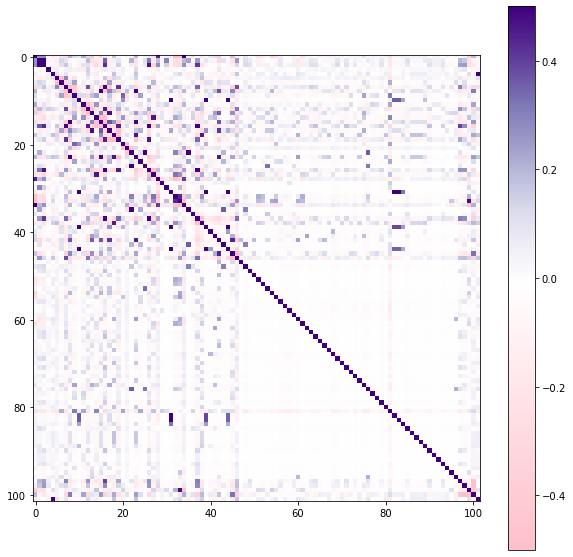

In [8]:
corr_matrix = np.corrcoef(data.T)
pd.DataFrame(corr_matrix)
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix, cmap = newcmp, vmax = .5, vmin = -.5)
plt.colorbar()
plt.show()

(-0.03, 0.03)

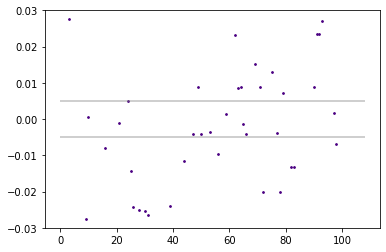

In [9]:
n = len(corr_matrix[-1])
t = np.linspace(0,n-1, n)
plt.scatter(t, corr_matrix[-1], s=3, c='indigo')
plt.hlines(y=0.005, xmin=0, xmax = 108, color = 'gray', alpha = 0.5)
plt.hlines(y=-0.005, xmin=0, xmax = 108, color = 'gray', alpha = 0.5)
plt.ylim(-0.03, 0.03)

In [10]:
indexes = list(np.where( abs(corr_matrix[-1]) < 0.005)[0])

print("list of {:.2f} % columns that are weakly (corr < 0.05) corellated with target\n\n".format( len(indexes)/n * 100))
for name in data.columns[indexes]:
    print(name)

list of 9.80 % columns that are weakly (corr < 0.05) corellated with target


dress_preference_elegant
marital_status_single
cuisine_Afghan
cuisine_Australian
cuisine_Bar
cuisine_Chinese
cuisine_Diner
cuisine_Doughnuts
cuisine_Juice
payment_MasterCard-Eurocard


In [11]:
indexes = list(np.where( abs(corr_matrix[-1]) >0.07)[0])

print("list of {:.2f} % columns that are strongly (corr > 0.07) corellated with target\n\n".format( len(indexes)/n * 100))
for name in data.columns[indexes]:
    print(name)

list of 28.43 % columns that are strongly (corr > 0.07) corellated with target


birth_year
stars
smoking_false
smoking_true
drinker_abstemious
dress_preference_informal
dress_preference_no preference
transport_on foot
transport_public
interest_eco-friendly
interest_variety
religion_Christian
religion_none
activity_professional
activity_student
activity_unemployed
color_black
color_blue
color_green
color_red
color_yellow
budget_low
budget_medium
cuisine_Breakfast-Brunch
cuisine_Contemporary
cuisine_Japanese
cuisine_Mexican
payment_bank_debit_cards
target


## Cash table

In [12]:
cash = pd.DataFrame(data['target'])
cash['payment_cash'] = data['payment_cash']
cash['payment_American_Express'] = data['payment_American_Express']
cash['payment_MasterCard-Eurocard'] = data['payment_MasterCard-Eurocard']
cash['payment_VISA'] = data['payment_VISA']
cash['payment_bank_debit_cards'] = data['payment_bank_debit_cards']
cash['budget_high'] = data['budget_high']
cash['budget_low'] = data['budget_low']
cash['budget_medium'] = data['budget_medium']

cash

,target,payment_cash,payment_American_Express,payment_MasterCard-Eurocard,payment_VISA,payment_bank_debit_cards,budget_high,budget_low,budget_medium
0,1,1,0,0,0,0,0,0,1
1,2,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2461,0,1,0,0,0,0,0,1,0
2462,0,1,0,0,0,0,0,1,0
2463,0,1,0,0,0,0,0,1,0
2464,0,1,0,0,0,0,0,1,0


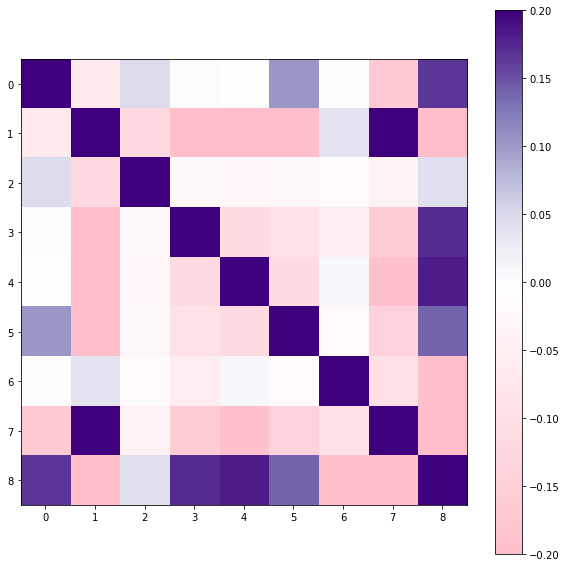

In [13]:
corr_matrix = np.corrcoef(cash.T)
pd.DataFrame(corr_matrix)
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix, cmap = newcmp, vmax = 0.2, vmin = -.2)
plt.colorbar()
plt.yticks([0,1,2,3,4,5,6,7,8])
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.show()

## Restaurant Table

In [14]:
df_inner = pd.merge(restaurant_cusine, restaurant_open, on='restaurantID', how='inner')
df_inner = pd.merge(df_inner, restaurant_parking, on='restaurantID', how='inner')
restaurant = pd.merge(df_inner, restaurant_payment, on='restaurantID', how='inner')

In [15]:
restaurant['days;;;;;;;;'].value_counts()

Mon;Tue;Wed;Thu;Fri;;;    1368
Sat;;;;;;;                1344
Sun;;;;;;;                1342
Sat;;;;;;                  132
Mon;Tue;Wed;Thu;Fri;;      132
Sun;;;;;;                   52
Sun;;;;                     18
Mon;Tue;Wed;Thu;Fri         18
Sat;;;;                     18
Name: days;;;;;;;;, dtype: int64

In [16]:
restaurant['hours'].value_counts()

00:00-23:30;                637
11:00-21:00;                189
12:00-22:00;                187
13:30-15:00;05:30-22:00;    144
12:00-21:00;                131
                           ... 
21:00-01:00;                  1
18:00-01:00;                  1
07:00-13:00;                  1
11:00-19:30;                  1
03:00-23:30;                  1
Name: hours, Length: 226, dtype: int64

In [17]:
restaurant.replace("Mon;Tue;Wed;Thu;Fri;;;", "Workdays", inplace=True)
restaurant.replace("Mon;Tue;Wed;Thu;Fri;;", "Workdays", inplace=True)
restaurant.replace("Mon;Tue;Wed;Thu;Fri", "Workdays",inplace=True)

restaurant.replace("Sat;;;;;;;", "Sat",inplace=True)
restaurant.replace("Sat;;;;;;", "Sat",inplace=True)
restaurant.replace("Sat;;;;;", "Sat",inplace=True)
restaurant.replace("Sat;;;;", "Sat",inplace=True)

restaurant.replace("Sun;;;;;;;", "Sun",inplace=True)
restaurant.replace("Sun;;;;;;", "Sun", inplace=True)
restaurant.replace("Sun;;;;;", "Sun",inplace=True)
restaurant.replace("Sun;;;;", "Sun",inplace=True)

restaurant.rename(columns={"days;;;;;;;;" : "days"}, inplace=True)
restaurant['days'].value_counts()

Workdays    1518
Sat         1494
Sun         1412
Name: days, dtype: int64

In [18]:
n = len(restaurant['hours'])
opening = []
closing = []
long = []
for i in range(n):
    o = restaurant['hours'][i].split( "-" )[0]
    o = int(o[:2])
    c = restaurant['hours'][i].replace(";", "-").split( "-" )[1]
    c = int(c[:2])
    if c == 0:
        c = 24
    opening.append(o)
    closing.append(c)
    
restaurant['opening'] = opening
restaurant['closing'] = closing
restaurant.head(20)

,restaurantID,cuisine,hours,days,parking_lot,payment,opening,closing
0,135110,Spanish,08:00-19:00;,Workdays,none,cash,8,19
1,135110,Spanish,08:00-19:00;,Workdays,none,VISA,8,19
2,135110,Spanish,08:00-19:00;,Workdays,none,MasterCard-Eurocard,8,19
3,135110,Spanish,08:00-19:00;,Workdays,none,American_Express,8,19
4,135110,Spanish,08:00-19:00;,Workdays,none,bank_debit_cards,8,19
5,135110,Spanish,00:00-00:00;,Sat,none,cash,0,24
6,135110,Spanish,00:00-00:00;,Sat,none,VISA,0,24
7,135110,Spanish,00:00-00:00;,Sat,none,MasterCard-Eurocard,0,24
8,135110,Spanish,00:00-00:00;,Sat,none,American_Express,0,24
9,135110,Spanish,00:00-00:00;,Sat,none,bank_debit_cards,0,24


In [19]:
def get_open_marker(start, end, m):
    
    tmp = np.zeros(m, dtype = int)
    
    for j in range(m):
        if restaurant['opening'][j] ==0 and restaurant['closing'][j] ==0:
            tmp[j]=3
            
        elif restaurant['opening'][j] < restaurant['closing'][j]:
            if restaurant['opening'][j] <= start and  restaurant['closing'][j] >= end:
                tmp[j]=1
            
        elif restaurant['opening'][j] > restaurant['closing'][i]:
            if restaurant['closing'][j] <= start and restaurant['opening'][j]>= end:
                tmp[j]=0
            else:
                tmp[j]=1
      
    
    return tmp
            

In [20]:
m = len(restaurant['hours'])
restaurant['open_00_01'] = get_open_marker(0, 1, m)
restaurant['open_01_02'] = get_open_marker(1, 2, m)
restaurant['open_02_03'] = get_open_marker(2, 3, m)
restaurant['open_03_04'] = get_open_marker(3, 4, m)
restaurant['open_04_05'] = get_open_marker(4, 5, m)
restaurant['open_05_06'] = get_open_marker(5, 6, m)
restaurant['open_06_07'] = get_open_marker(6, 7, m)
restaurant['open_07_08'] = get_open_marker(7, 8, m)
restaurant['open_08_09'] = get_open_marker(8, 9, m)
restaurant['open_09_10'] = get_open_marker(9, 10, m)
restaurant['open_10_11'] = get_open_marker(10, 11, m)
restaurant['open_11_12'] = get_open_marker(11, 12, m)
restaurant['open_12_13'] = get_open_marker(12, 13, m)
restaurant['open_13_14'] = get_open_marker(13, 14, m)
restaurant['open_14_15'] = get_open_marker(14, 15, m)
restaurant['open_15_16'] = get_open_marker(15, 16, m)
restaurant['open_16_17'] = get_open_marker(16, 17, m)
restaurant['open_17_18'] = get_open_marker(17, 18, m)
restaurant['open_18_19'] = get_open_marker(18, 19, m)
restaurant['open_19_20'] = get_open_marker(19, 20, m)
restaurant['open_20_21'] = get_open_marker(20, 21, m)
restaurant['open_21_22'] = get_open_marker(21, 22, m)
restaurant['open_22_23'] = get_open_marker(22, 23, m)
restaurant['open_23_24'] = get_open_marker(23, 24, m)

In [21]:
restaurant.head(10)

,restaurantID,cuisine,hours,days,parking_lot,payment,opening,closing,open_00_01,open_01_02,...,open_14_15,open_15_16,open_16_17,open_17_18,open_18_19,open_19_20,open_20_21,open_21_22,open_22_23,open_23_24
0,135110,Spanish,08:00-19:00;,Workdays,none,cash,8,19,0,0,...,1,1,1,1,1,0,0,0,0,0
1,135110,Spanish,08:00-19:00;,Workdays,none,VISA,8,19,0,0,...,1,1,1,1,1,0,0,0,0,0
2,135110,Spanish,08:00-19:00;,Workdays,none,MasterCard-Eurocard,8,19,0,0,...,1,1,1,1,1,0,0,0,0,0
3,135110,Spanish,08:00-19:00;,Workdays,none,American_Express,8,19,0,0,...,1,1,1,1,1,0,0,0,0,0
4,135110,Spanish,08:00-19:00;,Workdays,none,bank_debit_cards,8,19,0,0,...,1,1,1,1,1,0,0,0,0,0
5,135110,Spanish,00:00-00:00;,Sat,none,cash,0,24,1,1,...,1,1,1,1,1,1,1,1,1,1
6,135110,Spanish,00:00-00:00;,Sat,none,VISA,0,24,1,1,...,1,1,1,1,1,1,1,1,1,1
7,135110,Spanish,00:00-00:00;,Sat,none,MasterCard-Eurocard,0,24,1,1,...,1,1,1,1,1,1,1,1,1,1
8,135110,Spanish,00:00-00:00;,Sat,none,American_Express,0,24,1,1,...,1,1,1,1,1,1,1,1,1,1
9,135110,Spanish,00:00-00:00;,Sat,none,bank_debit_cards,0,24,1,1,...,1,1,1,1,1,1,1,1,1,1


In [22]:
stars_restaurant = pd.merge(restaurant, stars, on='restaurantID', how='inner')
stars_restaurant.drop('hours', axis = 1, inplace = True)
stars_restaurant.drop('Unnamed: 0', axis = 1, inplace = True)
stars_restaurant.drop('guestID', axis = 1, inplace = True)

stars_restaurant

,restaurantID,cuisine,days,parking_lot,payment,opening,closing,open_00_01,open_01_02,open_02_03,...,open_15_16,open_16_17,open_17_18,open_18_19,open_19_20,open_20_21,open_21_22,open_22_23,open_23_24,stars
0,135109,Italian,Workdays,none,cash,8,21,0,0,0,...,1,1,1,1,1,1,0,0,0,0
1,135109,Italian,Workdays,none,cash,8,21,0,0,0,...,1,1,1,1,1,1,0,0,0,2
2,135109,Italian,Workdays,none,cash,8,21,0,0,0,...,1,1,1,1,1,1,0,0,0,1
3,135109,Italian,Workdays,none,cash,8,21,0,0,0,...,1,1,1,1,1,1,0,0,0,1
4,135109,Italian,Sat,none,cash,8,21,0,0,0,...,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,132560,Regional,Sat,public,cash,0,24,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5795,132560,Regional,Sun,public,cash,0,24,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5796,132560,Regional,Sun,public,cash,0,24,1,1,1,...,1,1,1,1,1,1,1,1,1,0
5797,132560,Regional,Sun,public,cash,0,24,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [23]:
stars_restaurant['cuisine'] = stars_restaurant['cuisine'].astype(object)
stars_restaurant['days'] = stars_restaurant['days'].astype(object)
stars_restaurant['parking_lot'] = stars_restaurant['parking_lot'].astype(object)
stars_restaurant['payment'] = stars_restaurant['payment'].astype(object)


# Some of the predictors are categorical. Lets produce some dummy variables
categorical_bolean = (stars_restaurant.dtypes == "object").values
data_numeric = stars_restaurant.loc[:, ~categorical_bolean]
data_categorical = stars_restaurant.loc[:, categorical_bolean]
data_dummies = pd.get_dummies(data_categorical)

data = pd.concat([data_numeric, data_dummies], axis=1)
data['target'] = data['stars']
data.head()

,restaurantID,opening,closing,open_00_01,open_01_02,open_02_03,open_03_04,open_04_05,open_05_06,open_06_07,...,parking_lot_public,parking_lot_valet parking,parking_lot_yes,payment_American_Express,payment_Carte_Blanche,payment_MasterCard-Eurocard,payment_VISA,payment_bank_debit_cards,payment_cash,target
0,135109,8,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,135109,8,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,135109,8,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,135109,8,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,135109,8,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


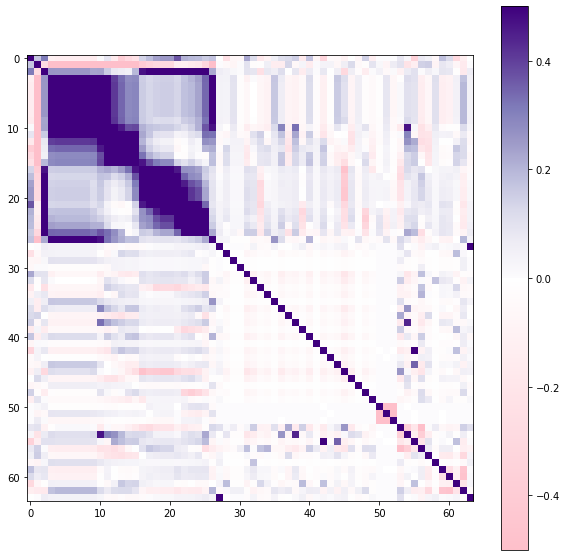

In [24]:
corr_matrix = np.corrcoef(data.T)
pd.DataFrame(corr_matrix)
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix, cmap = newcmp, vmax = .5, vmin = -.5)
plt.colorbar()
plt.show()

(-0.1, 0.1)

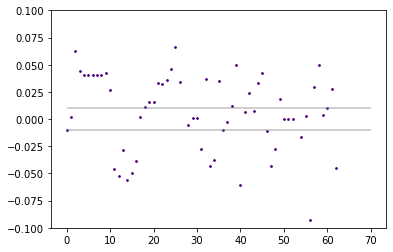

In [25]:
n = len(corr_matrix[-1])
t = np.linspace(0,n-1, n)
plt.scatter(t, corr_matrix[-1], s=3, c='indigo')
plt.hlines(y=0.01, xmin=0, xmax = 70, color = 'gray', alpha = 0.5)
plt.hlines(y=-0.01, xmin=0, xmax = 70, color = 'gray', alpha = 0.5)
plt.ylim(-0.1, 0.1)


In [26]:
indexes = list(np.where( abs(corr_matrix[-1]) < 0.005)[0])

print("list of {:.2f} % columns that are weakly (corr < 0.005) corellated with target\n\n".format( len(indexes)/n * 100))
for name in data.columns[indexes]:
    print(name)

list of 15.62 % columns that are weakly (corr < 0.005) corellated with target


opening
open_14_15
cuisine_Armenian
cuisine_Bakery
cuisine_Chinese
days_Sat
days_Sun
days_Workdays
parking_lot_valet parking
payment_MasterCard-Eurocard


In [27]:
indexes = list(np.where( abs(corr_matrix[-1]) >0.01)[0])

print("list of {:.2f} % columns that are strongly (corr > 0.01) corellated with target\n\n".format( len(indexes)/n * 100))
for name in data.columns[indexes]:
    print(name)

list of 78.12 % columns that are strongly (corr > 0.01) corellated with target


closing
open_00_01
open_01_02
open_02_03
open_03_04
open_04_05
open_05_06
open_06_07
open_07_08
open_08_09
open_09_10
open_10_11
open_11_12
open_12_13
open_13_14
open_15_16
open_16_17
open_17_18
open_18_19
open_19_20
open_20_21
open_21_22
open_22_23
open_23_24
stars
cuisine_Bar
cuisine_Bar_Pub_Brewery
cuisine_Breakfast-Brunch
cuisine_Burgers
cuisine_Cafe-Coffee_Shop
cuisine_Cafeteria
cuisine_Contemporary
cuisine_Family
cuisine_Fast_Food
cuisine_International
cuisine_Japanese
cuisine_Mexican
cuisine_Pizzeria
cuisine_Regional
cuisine_Seafood
cuisine_Vietnamese
parking_lot_none
parking_lot_public
parking_lot_yes
payment_American_Express
payment_Carte_Blanche
payment_VISA
payment_bank_debit_cards
payment_cash
target


In [28]:
indexes = list(np.where( abs(corr_matrix[-1]) >0.05)[0])

print("list of {:.2f} % columns that are very strongly (corr > 0.05) corellated with target\n\n".format( len(indexes)/n * 100))
for name in data.columns[indexes]:
    print(name)

list of 14.06 % columns that are very strongly (corr > 0.05) corellated with target


closing
open_09_10
open_11_12
open_22_23
stars
cuisine_Fast_Food
parking_lot_none
parking_lot_yes
target


# Stars table

In [29]:
stars.drop( 'Unnamed: 0', axis = 1, inplace = True)
guestID = []
for i in range(len(stars)):
    guestID.append(int(stars['guestID'][i][1:]))
stars['guestID'] = guestID

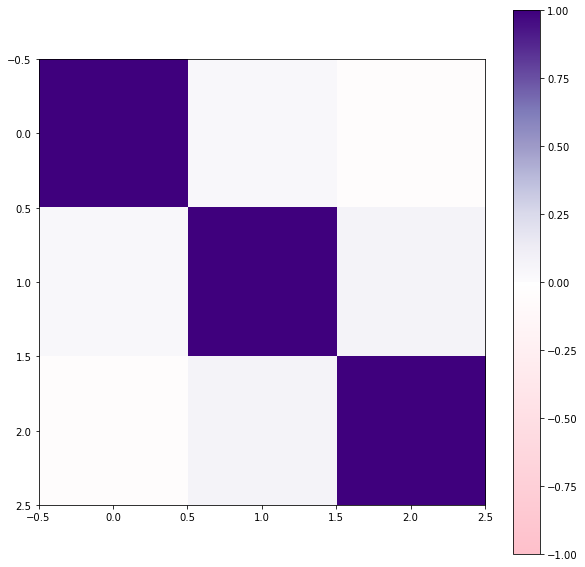

In [30]:
corr_matrix = np.corrcoef(stars.T)
pd.DataFrame(corr_matrix)
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix, cmap = newcmp, vmax = 1, vmin = -1)
plt.colorbar()
plt.show()

Based on the correlation matrices for guests, restaurants and stars I decided to remove from future data sets columns: 
* "opening" and "days" in restaurants data frame (reason: small correlation with target) 
* "payment" (reason:  we have also acces to how clients pay for dinner, so as long we know, that the client managed to pay, we dont need to know, which other methods were avaiable). 
* "guestID", "restaurantID", "stars" (they are practically independent)

I alsp replace "birth_year" with "age" calculated as age = (2021 - birth_year)

In Data_Preprocessing notebook --> preparation for datasets